In [49]:
%load_ext autoreload
%autoreload 2

from state import State, GridField
from domain import Domain
from swe_operators import SweAdvectiveFormOperator
from time_schemes import rk4
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import trisurf_field, animate_trisurf, surf_interpolated_field, animate_interpolated_surf, \
                          animate_tripcolor, tripcolor_field, imshow_interpolated_field

import numpy as np
from vecmath import calc_mass
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Тестируем дифференцирование

In [50]:
domains = [Domain(xs = 0.0,   xe = np.pi,   nx = 32, ys = 0.0, ye = 2*np.pi, ny = 32,  lx=2*np.pi, ly=2*np.pi), \
           Domain(xs = np.pi, xe = 2*np.pi, nx = 32, ys = 0.0, ye = 2*np.pi, ny = 32,  lx=2*np.pi, ly=2*np.pi)]

In [51]:
f = GridField.empty(domains)
df_dx = GridField.empty(domains)
df_dy = GridField.empty(domains)
for ind, domain in enumerate(domains):
    f[ind] = np.sin(domain.xx)*np.cos(domain.yy)
    df_dx[ind] = np.cos(domain.xx)*np.cos(domain.yy)
    df_dy[ind] = -np.sin(domain.xx)*np.sin(domain.yy)

In [52]:
gx, gy = op.calc_grad(f, domains, op.diff_sbp21)

<IPython.core.display.Javascript object>


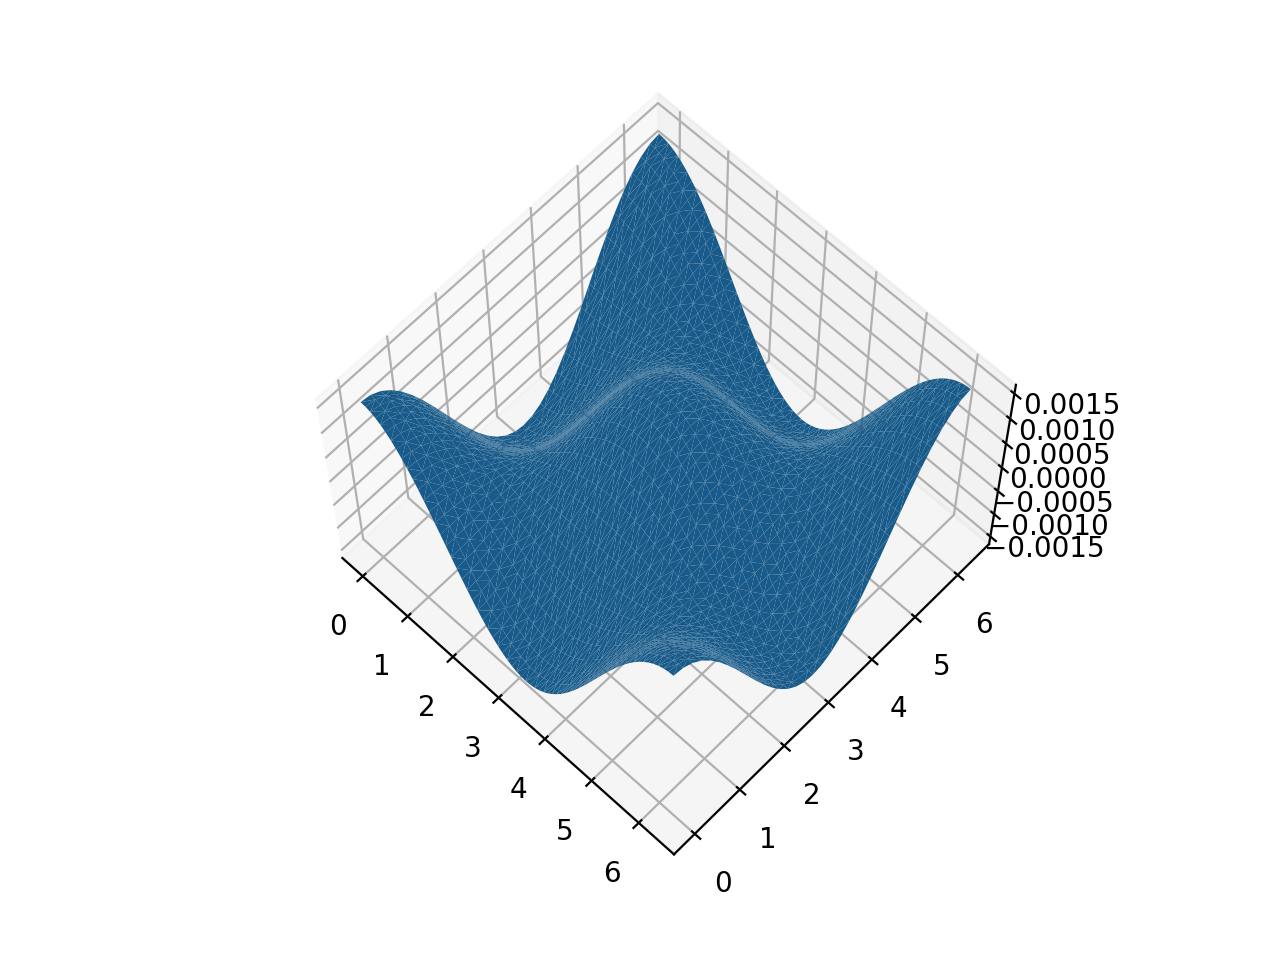

In [53]:
trisurf_field(df_dx - gx, domains)

# Тестируем одномерную интерполяцию вдоль Y

In [10]:
domains = [Domain(xs = 0.0,   xe = np.pi,   nx = 64, ys = 0.0, ye = 2*np.pi, ny = 128,  lx=2*np.pi, ly=2*np.pi), \
           Domain(xs = np.pi, xe = 2*np.pi, nx = 32, ys = 0.0, ye = 2*np.pi, ny = 64,  lx=2*np.pi, ly=2*np.pi)]

In [11]:
f_fine = np.sin(domains[0].y)
f_coarse = np.sin(domains[1].y)

In [12]:
f_interp = op.interp_1d_sbp42_2to1_ratio(f_fine, "fine2coarse")

<IPython.core.display.Javascript object>


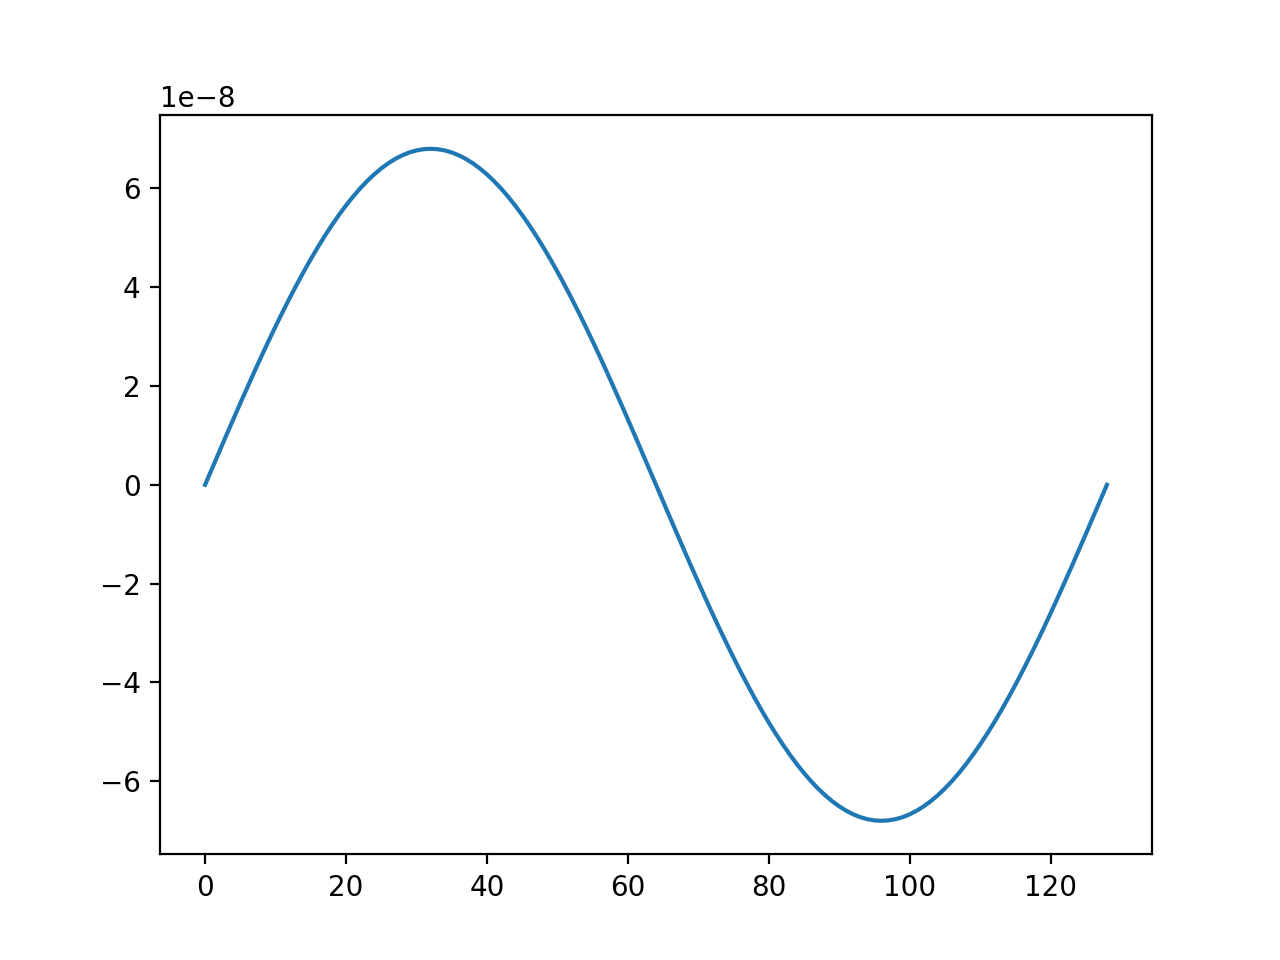

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(f_coarse - f_interp)

In [14]:
f_interp = op.interp_1d_sbp42_2to1_ratio(f_coarse, "coarse2fine")

<IPython.core.display.Javascript object>


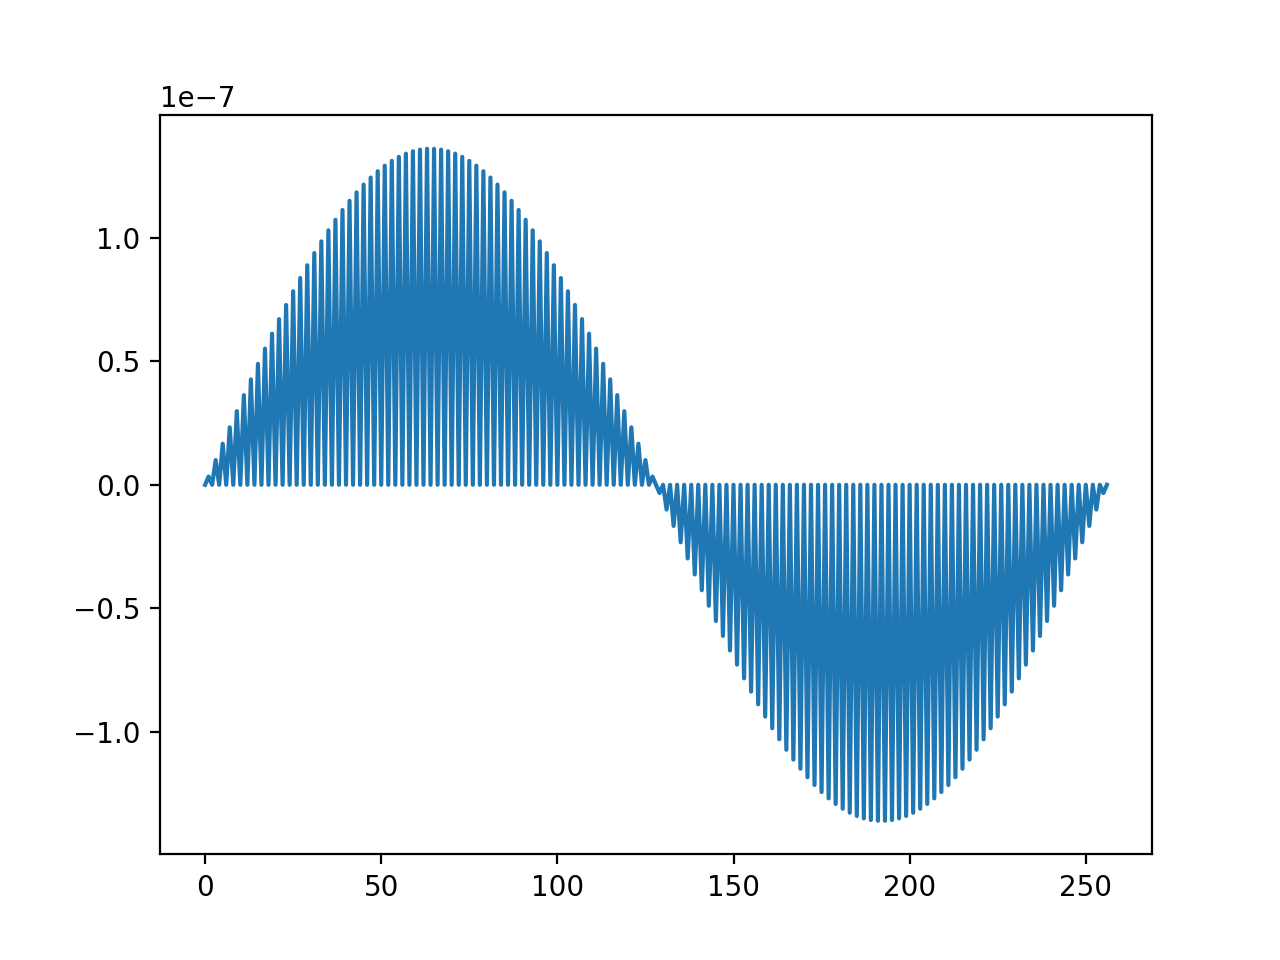

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(f_fine - f_interp)

In [44]:
f_coarse[0] - f_interp[0]

-0.012277991713154959